In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms


In [2]:
# Os dados baixados devemn ser convertidos para Torch Tensors. Assim será instanciado um objeto para transformações:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

In [3]:
# loading dos dados de treino (pipeline - aplicando transform)
data_train = torch.utils.data.DataLoader(datasets.MNIST("data", train= True, download= True,
                                                       transform= transform), 
                                         batch_size= 64, shuffle= True)

In [4]:
# loading dos dados de teste
data_test = torch.utils.data.DataLoader(datasets.MNIST("data", train= False, transform= transform),
                                       batch_size= 64, shuffle= True)

In [5]:
# dimensão dos dados de treino 1:
data_train.dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
# dimensão dos dados de treino 2: (dentro de 1 batch)
dataiter = iter(data_train)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

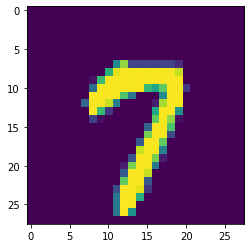

In [7]:
# visualizando 1 imagem e o label
plt.imshow(images[0][0].numpy())

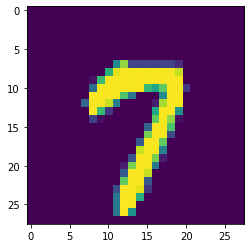

In [8]:
# visualizando 1 imagem e o label com squeeze
plt.imshow(images[0].numpy().squeeze())

In [9]:
# Construindo o modelo:
model = nn.Sequential(nn.Linear(in_features=784, out_features=128, bias=True),
                     nn.ReLU(),
                     nn.Linear(in_features=128, out_features=64),
                     nn.ReLU(),
                     nn.Linear(in_features=64, out_features=10),
                     nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [10]:
# Função de custo - NLLLOSS - negative Likelihood Loss
criterion = nn.NLLLoss()

In [11]:
# data branchs
images, labels = next(iter(data_train))

In [12]:
# shape adjustment
images = images.view(images.shape[0], -1)

In [13]:
# logs of probability class
logps = model(images)

In [14]:
# loss
loss = criterion(logps, labels)

In [15]:
# peso do gradiente antes do primeiro batch
print(model[0].weight.grad)
# peso do gradiente depois do batch
loss.backward()
print(model[0].weight.grad)

None
tensor([[-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


#### training

In [18]:
# optimizer
optimizer = optim.SGD(params=model.parameters(), lr=0.03, momentum= 0.9)

epochs = 10

for e in range(epochs):
    running_loss = 0 # erro da época zerado
    
    for images, labels in data_train:
        images = images.view(images.shape[0], -1) # image flatten
        optimizer.zero_grad() # training pass
        output = model(images)
        loss = criterion(output, labels)
        loss.backward() # backpropagation
        optimizer.step() # otimização dos passos
        running_loss = running_loss + loss.item()
    print(f"Epoch: {e} .... Loss: {running_loss / len(data_train)}")

Epoch: 0 .... Loss: 0.36880370989036776
Epoch: 1 .... Loss: 0.16818148156862334
Epoch: 2 .... Loss: 0.13165647643449496
Epoch: 3 .... Loss: 0.11498844623813895
Epoch: 4 .... Loss: 0.09999809097332348
Epoch: 5 .... Loss: 0.08979770771837406
Epoch: 6 .... Loss: 0.08134204961993952
Epoch: 7 .... Loss: 0.07066143435262975
Epoch: 8 .... Loss: 0.06696611644761231
Epoch: 9 .... Loss: 0.06261395686461196


### Evaluation and test

In [ ]:
# Cáclulo por acurácia (True Positive / all tests)

In [74]:
true_positive, all_data = 0, 0
for images, labels in data_test:
    for i in range(labels.shape[0]):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            true_positive += 1
        all_data += 1
print(f"ACC: {true_positive / all_data}")

ACC: 0.9693


In [75]:
# salvar o modelo
torch.save(model, "modelo_torch_nn_medium.pt")